<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Реализация-reversel-list" data-toc-modified-id="Реализация-reversel-list-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Реализация reversel list</a></span></li><li><span><a href="#Время-работы-функций" data-toc-modified-id="Время-работы-функций-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Время работы функций</a></span></li><li><span><a href="#Затраты-по-памяти" data-toc-modified-id="Затраты-по-памяти-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Затраты по памяти</a></span></li><li><span><a href="#Интересная-визуализация" data-toc-modified-id="Интересная-визуализация-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Интересная визуализация</a></span></li></ul></div>

# Импорты

In [1]:
import timeit
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(18,10)})
%load_ext snakeviz
%load_ext memory_profiler

# Реализация reversel list


In [2]:
lst = list(range(1000))

In [3]:
def reverse_with_range(s: list) -> list:
    reversed_output = []
    s_length = len(s)
    for i in range(s_length-1, 0-1, -1):
        reversed_output.append(s[i])
    return reversed_output

In [4]:
def reverse_with_insert(s: list) -> list:
    reversed_output = []
    for c in s:
        reversed_output.insert(0,c)
    return reversed_output

In [5]:
def reverse_swap(s: list) -> list:
    s_length = len(s)
    s_list = s.copy()
    j = s_length-1
    for i in range(s_length-1):
        swap_var = s_list[j]
        s_list[j] = s_list[i] 
        s_list[i] = swap_var
        j=j-1
        if (j<i):
            break
    return s_list

In [6]:
def reverse_bultin(s: list) -> list:
    s_list = s.copy()
    return s_list.reverse()

In [7]:
def reverse_list_index(s: list) -> list:
    return s[::-1]

In [8]:
functions_names = ["reverse_with_range", "reverse_with_insert", "reverse_swap", "reverse_bultin", "reverse_list_index"]

# Время работы функций

In [9]:
SETUP_CODE = '''
from __main__ import {}
lst = list(range(1000))
'''
      
TEST_CODE = '''
{}(lst)
    '''

In [10]:
def calc_time():
    time_result = []

    for i in range(len(functions_names)):
        times = timeit.timeit(
                              setup = SETUP_CODE.format(functions_names[i]),
                              stmt = TEST_CODE.format(functions_names[i]))
        time_result.append(times)  
    return time_result

In [11]:
result = calc_time()

In [13]:
import pandas as pd
d = {'Methods':functions_names,'Time':result}
df = pd.DataFrame(d)
df

,Methods,Time
0,reverse_with_range,57.320887
1,reverse_with_insert,313.625011
2,reverse_swap,59.349674
3,reverse_bultin,2.006396
4,reverse_list_index,1.720138


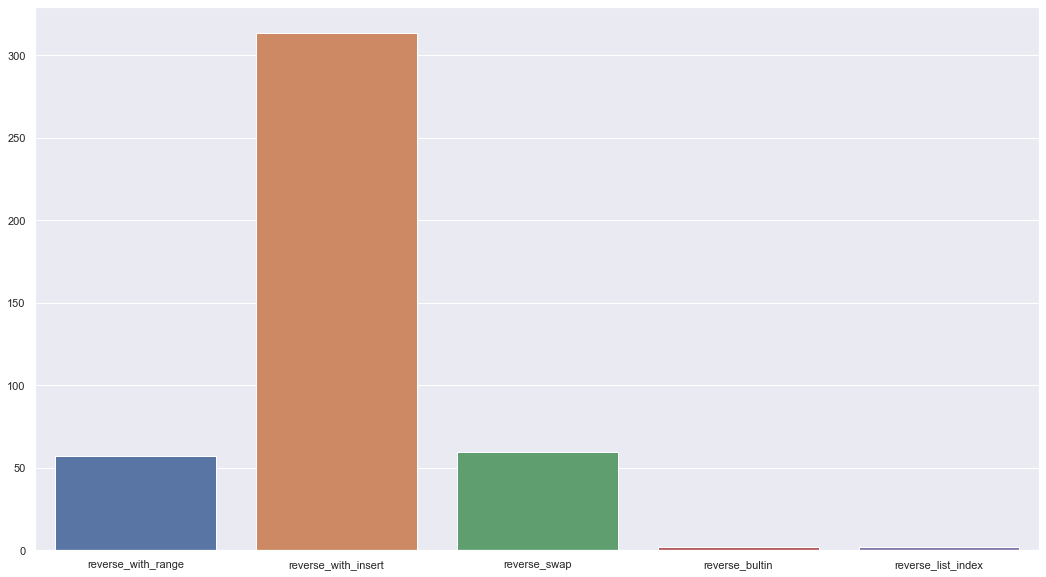

In [14]:
sns.barplot(x=functions_names, y=result)

# Затраты по памяти

In [15]:
%memit reverse_with_range(lst)

peak memory: 138.30 MiB, increment: 0.09 MiB


In [16]:
%memit reverse_with_insert(lst)

peak memory: 138.33 MiB, increment: 0.02 MiB


In [17]:
%memit reverse_swap(lst)

peak memory: 138.34 MiB, increment: 0.00 MiB


In [18]:
%memit reverse_bultin(lst)

peak memory: 138.35 MiB, increment: 0.00 MiB


In [19]:
%memit reverse_list_index(lst)

peak memory: 138.37 MiB, increment: 0.00 MiB
